In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import pandas

/tmp/ipykernel_8133/868110576.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


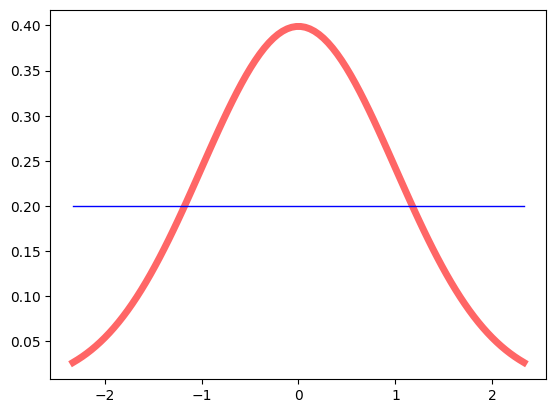

In [5]:
fig, ax = plt.subplots()
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)

ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6)

ax.plot(x, np.full(len(x), 0.2),
       'b-', lw=1)

fig.show()

In [50]:
df = pandas.read_csv('data/TCL_wt1.tsv', sep = '\t', na_values = '#VALEUR!', dtype = {"Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT)":float,
                                                                                     "Accession":str,
                                                                                     "Description":str,
                                                                                      "Gene Symbol":str,
                                                                                      "Corrected Abundance ratio (1.53)":float,
                                                                                      "Log2 Corrected Abundance Ratio" : float,
                                                                                      "-LOG10 Adj.P-val" : float
                                                                                     })
df = df.dropna() #permet de récupérer une dataframe 'propre'
df.describe()

,Corrected Abundance ratio (1.53),Log2 Corrected Abundance Ratio,Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT),-LOG10 Adj.P-val
count,1746.000000,1746.000000,1.746000e+03,1746.000000
mean,0.672483,-0.638626,8.234275e-01,0.384861
std,0.186014,0.470759,3.509350e-01,1.067665
min,0.075817,-3.721335,1.034030e-08,0.000000
25%,0.564869,-0.824011,1.000000e+00,0.000000
50%,0.701307,-0.511882,1.000000e+00,0.000000
75%,0.782190,-0.354410,1.000000e+00,0.000000
max,1.798039,0.846424,1.000000e+00,7.985468


In [53]:
values = df[['Description', 'Gene Symbol']]
type(values)

pandas.core.frame.DataFrame

-0.63862621564433 0.47062451611275274


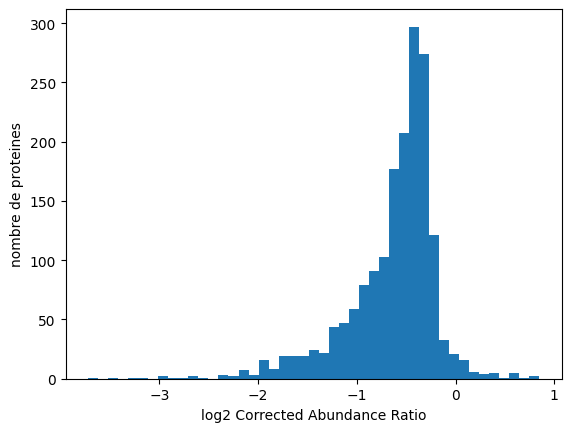

In [67]:
min(df["Log2 Corrected Abundance Ratio"].tolist())
log_ab = df["Log2 Corrected Abundance Ratio"].tolist()
fig, ax = plt.subplots()
_ = ax.hist(log_ab, bins = 45) #'_' c'est une variable dont on se fiche
_ = ax.set_xlabel("log2 Corrected Abundance Ratio")
_ = ax.set_ylabel("nombre de proteines")

#On veut superposer une loi normale, donc on a besoin des parametres mu et sigma
#On va donc les produires (moyenne et ecart-types) de cette liste

mu, std = (np.mean(log_ab), np.std(log_ab))
print(mu, std)

#pdf(mu, std, x) va nous donner de maniere ponctuelle les valeurs de la densité de la probabilité pour un x donné.
#On va donc utiliser linspace --> ca va positionner un certain nombre de valeurs (on pave les valeurs de x). On va donner ces valeurs à la fonction pdf qui va associer une densité aux valeurs de x
#On va fabriquer un nombre de valeurs equitablement réparties. On va prendre les min et max et pavés de 1000 points


In [70]:
x = np.linspace(min(log_ab), max(log_ab), num = 1000) #On recup toutes les valeurs possibles de x

In [74]:
from scipy.stats import norm
norm.pdf(x, mu, std)[:5] #Etant donné une valeur de probabilité va générer la densité de probabilité

array([4.08659767e-10, 4.35491128e-10, 4.64040353e-10, 4.94414491e-10,
       5.26727073e-10])

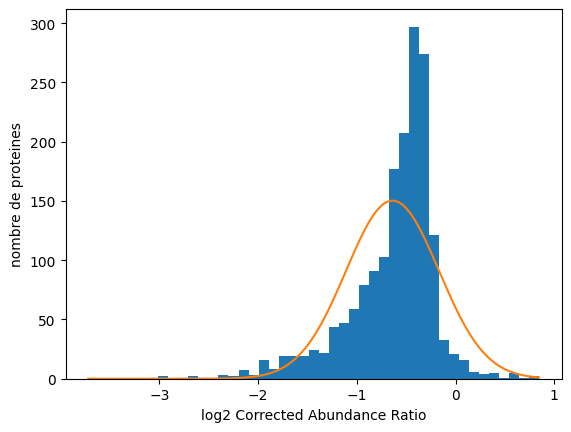

In [86]:
mu, std = (np.mean(log_ab), np.std(log_ab))
x = np.linspace(min(log_ab), max(log_ab), num = 1000)
y = norm.pdf(x, mu, std) * scale

min(df["Log2 Corrected Abundance Ratio"].tolist())
log_ab = df["Log2 Corrected Abundance Ratio"].tolist()
fig, ax = plt.subplots()
hist = ax.hist(log_ab, bins = 45) #'_' c'est une variable dont on se fiche
_ = ax.set_xlabel("log2 Corrected Abundance Ratio")
_ = ax.set_ylabel("nombre de proteines")
dx = hist[1][1] - hist[1][0]
scale = len(log_ab)*dx 



ax.plot(x, y) #On a un pb au niveau de la ligne représentée. 
#Densite de proba = application de la variable aleatoire dans l'espace de probabilité. Donc le co-domaine de la fonction est entre 0 et 1.
#La somme des valeurs possibles vaut 1.
#L'histogramme n'est pas un espace de probabilité, mais un espace de comptage. On doit donc le convertir : On multiplie donc par le nombre total de la population

#En realite, on superpose les histogrammes, donc on a pas plus d'histogramme que de points. On va donc devoir compter la surface de l'histogramme. En realite, le facteur de remise à l'echelle n'est pas la population, mais plutot la taille de l'histogramme



#Graphiquement, on voit que a correspond pas a une loi normale.

In [92]:
### Volcano Plot

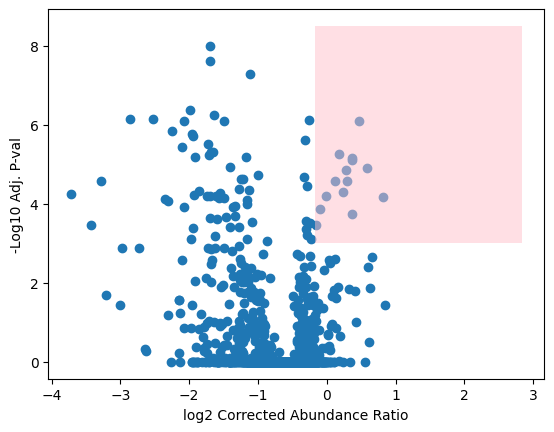

In [106]:
pval = df["-LOG10 Adj.P-val"].tolist()
log_ab = df["Log2 Corrected Abundance Ratio"].tolist()
fig, ax = plt.subplots()
scatter = ax.scatter(log_ab, pval) 
_ = ax.set_xlabel("log2 Corrected Abundance Ratio")
_ = ax.set_ylabel("-Log10 Adj. P-val")


#On cree les zones d'interet sur le volcano plot

from matplotlib.patches import Rectangle
x_min = mu + std
y_min = 3 #0.001
ax.add_patch(
    Rectangle((x_min, y_min), 3, 5.5, facecolor = 'pink', alpha = 0.5)
    )

In [124]:
#On veut voir si certains pathways sont surreprésenté
# Pour ca, on se concentre sur les id GO. 
#On va donc regarder quelles sont les proteines se trouvant dans le rectangle rose. on va recup les id uniprot.
#On va recup les deux champs représenté sur le graphique (pval et log_ab)
#On peut utiliser des selecter qui appliquent des contraintes de valeurs continues afin de ne selectionner que les lignes qui satisfaient les contraintes énoncées
#Ca va retourner une df et donc on veut extraire la valeur/id uniprot. (Accession)
#pval > 3 et log 2 = mean + std. 

#A combien de proteine ca correspond ?

list_accession = df.loc[(df["-LOG10 Adj.P-val"] > 3) & (df["Log2 Corrected Abundance Ratio"] > mu + std)]
# print(list_accession['Accession'])


#Onthology GO 
# C : compartiments
# F : 
# NF :

#Il faudra lire le fichier xml et produire un dico de dico dans lequel chaque element correspond a l'id, nom commun à l'ensemble des proteines ayant le terme GO
#On aura des <entry> qui donnera des infos sur les termes GO qui annote cette proteine. On va prendre ce fichier xml et produire un dico de terme GO.
#Est ce qu'on retrouve dans le volcano plot ls proteines retrouvées dans le dico
#Certaines prot possedent le terme GO et d'autres, non --> Dans notre cas, c'est le nombre de succes observé

#Il faut recup les p-valeur des proteines dans le cadran rose

1862    P0A8V6
1898    P0A9Q1
1929    P02358
1968    P0ACF8
1977    P62399
1979    P0A905
1982    P76506
1984    P13036
1989    P10384
1992    P06971
1996    P0A910
2003    P06996
2009    P76344
2021    P02931
Name: Accession, dtype: object


In [120]:
from xml.etree.ElementTree import parse, dump

def getAccessionGOTerms(xmlFile, accession):
    tree = parse(xmlFile)
    root = tree.getroot()
    ns = '{http://uniprot.org/uniprot}'
    
    match_go_terms = []
    proteins = root.findall(ns + 'entry')
    for entry in proteins:
        accessions = entry.findall(ns+"accession")
        current_accessions = [ acc.text for acc in accessions ]
        if not accession in current_accessions:
            continue
        goTerms = entry.findall('{http://uniprot.org/uniprot}dbReference[@type="GO"]')
        #goTerms = xmlEntry.findall(ns +'dbReference[@type="GO"]')
        for goT in goTerms:
            gID   = goT.attrib['id']
            gName = goT.find(ns +'property[@type="term"]').attrib['value']
            match_go_terms.append((gID, gName))
        break
    return match_go_terms
go_function = getAccessionGOTerms("./data/uniprot-proteome_UP000000625.xml", "P0A8V6")
print(go_function)

[('GO:0005829', 'C:cytosol'), ('GO:0003677', 'F:DNA binding'), ('GO:0003700', 'F:DNA-binding transcription factor activity'), ('GO:0000062', 'F:fatty-acyl-CoA binding'), ('GO:0019395', 'P:fatty acid oxidation'), ('GO:0045892', 'P:negative regulation of transcription, DNA-templated'), ('GO:0045723', 'P:positive regulation of fatty acid biosynthetic process'), ('GO:0045893', 'P:positive regulation of transcription, DNA-templated'), ('GO:0019217', 'P:regulation of fatty acid metabolic process')]


In [143]:
dico_go = {}

for name_prot in list_accession["Accession"]:
    print(name_prot)
    list_go = getAccessionGOTerms("./data/uniprot-proteome_UP000000625.xml", name_prot)
    if name_prot not in dico_go:
        dico_go = {name_prot: }

print(dico_go)

P0A8V6
P0A9Q1
P02358
P0ACF8
P62399
P0A905
P76506
P13036
P10384
P06971
P0A910
P06996
P76344
P02931
